In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


I had a bit of time to get back to your problem (trying to distinguish whether the presence of water or CO$_2$
makes a significant difference to the waveforms).

In revisiting my notes, I realise that the numerical integration (the equation with integrals) is quite horrendous and computationally expensive to compute.

The main aim was to discern if there was a significant difference between the subset of profiles (e.g. with water/CO$_2$) and the complete collection of profiles, and then quantify or measure that significance. However an easier way is as follows (it actually takes about one or two lines of code).

Make sure each profile consists of the same number of samples, lets call it $N$. Hence each profile is a vector of size ($N\times1$).

Take set of profiles where there is no water/CO$_2$ present, call this set $A$.
Take set of profiles where there is water/CO$_2$ present, call this set $B$.

Let $\mu_A$ = mean of set A
    $\mu_B$ = mean of set B
    $\sigma_A$  = standard deviation across set $A$
    $\sigma_B$ = standard deviation across set $B$

where $\mu_A$, $\mu_B$, $\sigma_A$ and $\sigma_B$ are all ($N\times1$) vectors.

Next if we define

$l_1(i) = \dfrac{\left| \mu_A(i) - \mu_B(i) \right|}{\sigma_A(i)}$,
$l_2(i) = \dfrac{\left| \mu_A(i) - \mu_B(i) \right|}{\sigma_B(i)}$

where $\mu_A(i)$ is the $i$th component of $\mu_A$, the vertical bars $|\bullet|$ denote the absolute, then

$\displaystyle l = \sum\limits_{i=1}^N \frac{l_1(i) + l_2(i)}{2}$.

The quantity labelled $l$ is 
nonnegative. Although I've made lots of *simplifications*, if $l$ is approximately 1, then the two average profiles (i.e. $\mu_A$ and $\mu_B$) are about one standard deviation apart. Hence if $l$ is approximately 2, then the difference is quite significant.

I'm pretty sure that this measure won't be very reliable, but is probably a good first pass. Its not so relaibale since

- you won't have enough data,
- I have ignored correlations in time
- the measure is very sensitive to misregistration (i.e. slight shifts of the signals in time)

However it might be a descent first pass. If there is some promise from this, then some of the above weaknesses can be countered with further complexity. The method we discussed when you were in Bath is more complicated and gives a better measure of the siginficance, but essentially does something similar to the shorter method above.


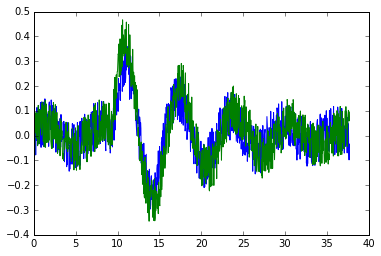

0.400526877092


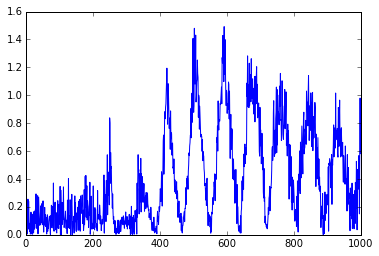

In [3]:
t=linspace(0,3*4*pi,1000)
N=len(t)
nu=0.1
#generate synthetic data
x1=[]
x2=[]
random.seed(0)
for i in range(100):
    xi=zeros(N)
    xj=zeros(N)
    xi[0:N/4]=0.05*sin(t[:N/4])+nu*(2*random.random(N/4)-1)
    xj[0:N/4]=0.05*sin(0.1+0.95*t[:N/4])+nu*(2*random.random(N/4)-1)
    xi[N/4:]=random.random()*sin(t[:3*N/4])*exp(-0.1*t[:3*N/4])+nu*(2*random.random(3*N/4)-1)
    xj[N/4:]=random.random()*sin(0.1+0.95*t[:3*N/4])*exp(-0.1*t[:3*N/4])+nu*(2*random.random(3*N/4)-1)
    x1.append(xi)
    x2.append(xj)
X1=matrix(x1)
X2=matrix(x2)

m1=zeros(N)
m2=zeros(N)
s1=zeros(N)
s2=zeros(N)

for i in range(N):
    m1[i]=mean(X1[:,i])
    m2[i]=mean(X2[:,i])
    s1[i]=std(X1[:,i])
    s2[i]=std(X2[:,i])
l1=abs(m1-m2)/s1
l2=abs(m1-m2)/s2

#plot(t,l1,t,l2)
plot(t,xi,t,xj)
show()
l = ((l1+l2)/2)
plot(l) 

print sum(l)/len(l)